<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/master/S12/S12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from google.colab import files
src = list(files.upload().values())[0]
open('dataloader_s12_3.py','wb').write(src)
import dataloader_s12_3 as dl
#src = list(files.upload().values())[0]
#open('plotimagefinal.py','wb').write(src)
import plotimagefinal as pimage
#src = list(files.upload().values())[0]
#open('model_def_resnet.py','wb').write(src)
#import model_def_resnet as modeldef
import torch
#src = list(files.upload().values())[0]
#open('lr_finder_s12.py','wb').write(src)
from lr_finder_s12 import LRFinder
#src = list(files.upload().values())[0]
#open('model_training_s12.py','wb').write(src)
import model_training_s12 as modeltrt
#src = list(files.upload().values())[0]
#open('utils.py','wb').write(src)
import utils as utils
#src = list(files.upload().values())[0]
#open('train_model.py','wb').write(src)
#import train_model as train_model
import utils as utils
import torch.nn as nn
import os
import torchvision.models as models
import torch.optim as optim
import torchvision.datasets as datasets

Saving dataloader_s12_3.py to dataloader_s12_3.py


In [0]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-agenuy8u
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-agenuy8u
     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=4443ba8c3bcca08e14631102a411f43a31ef86afc62a5d11bb23526f50c8a57f
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_bgdmcn/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=208dc8c2af23dd16fd84d4d0e580236a27b28d4efb124428cce4eb21e8dc43e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_bgdmcn/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

In [0]:
train_dl, test_dl, train_ds, test_ds=dl.load_data()

downloading http://cs231n.stanford.edu/tiny-imagenet-200.zip
test_set dir len is : 165
train_set dir len is : 385


In [0]:
print('####Validation Dataset is : \n\t\n{}'.format(train_ds))
print('####Validation Dataset is : \n\t\n{}'.format(test_ds))
#print('####Train and Validation Dataset is : \n\t\n{}'.format(tv_ds))

####Validation Dataset is : 
	
Dataset ImageFolder
    Number of datapoints: 77000
    Root location: train_set
    StandardTransform
Transform: <dataloader_s12_3.album_compose_train object at 0x7f2ee460e320>
####Validation Dataset is : 
	
Dataset ImageFolder
    Number of datapoints: 33000
    Root location: test_set
    StandardTransform
Transform: <dataloader_s12_3.album_compose_test object at 0x7f2e6e3a95f8>


In [0]:
from matplotlib import pyplot as plt
def show_imgs(img,label):
    print('Image label is : {}'.format(train_ds.classes[label]))
    plt.imshow(img.permute(1, 2, 0))

Image label is : n01443537


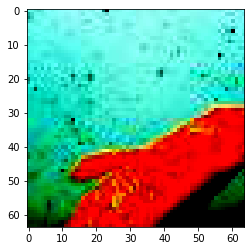

In [0]:
show_imgs(*test_ds[20])

In [0]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [0]:
def show_batch(dl,numOfImagesToDisplay=10,imgsPerRow=5):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(26, 26))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:numOfImagesToDisplay], imgsPerRow).permute(1, 2, 0))
        break

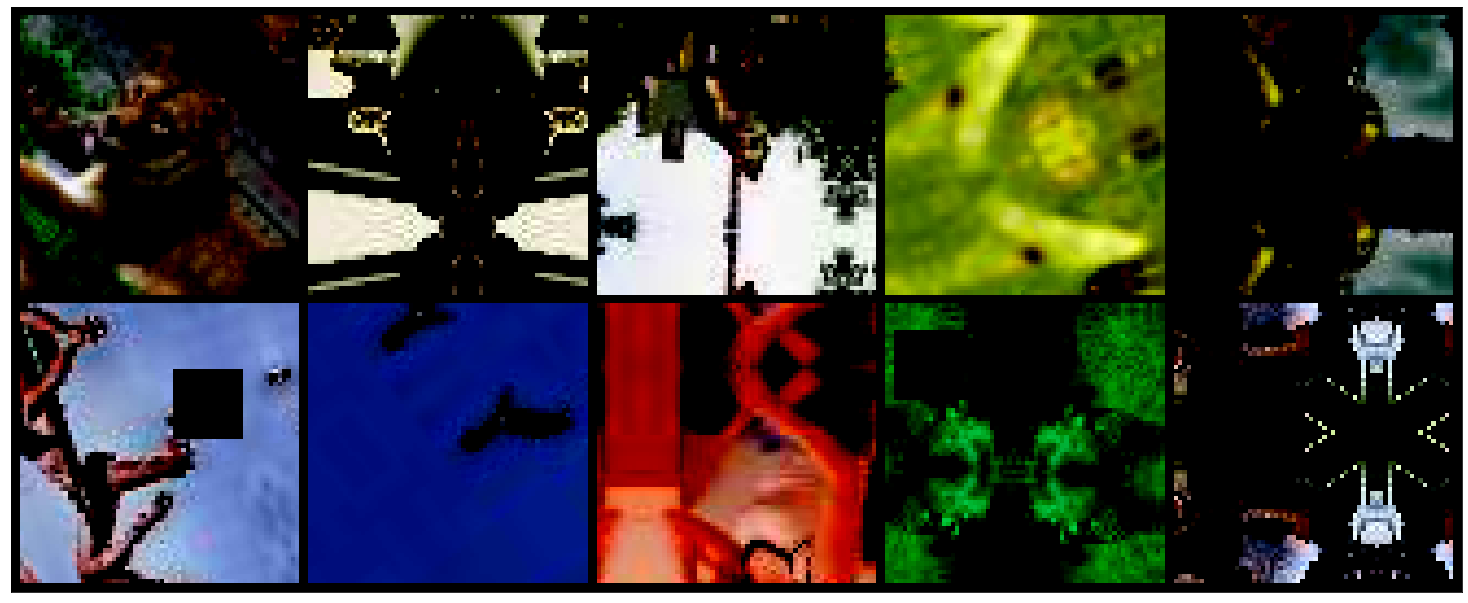

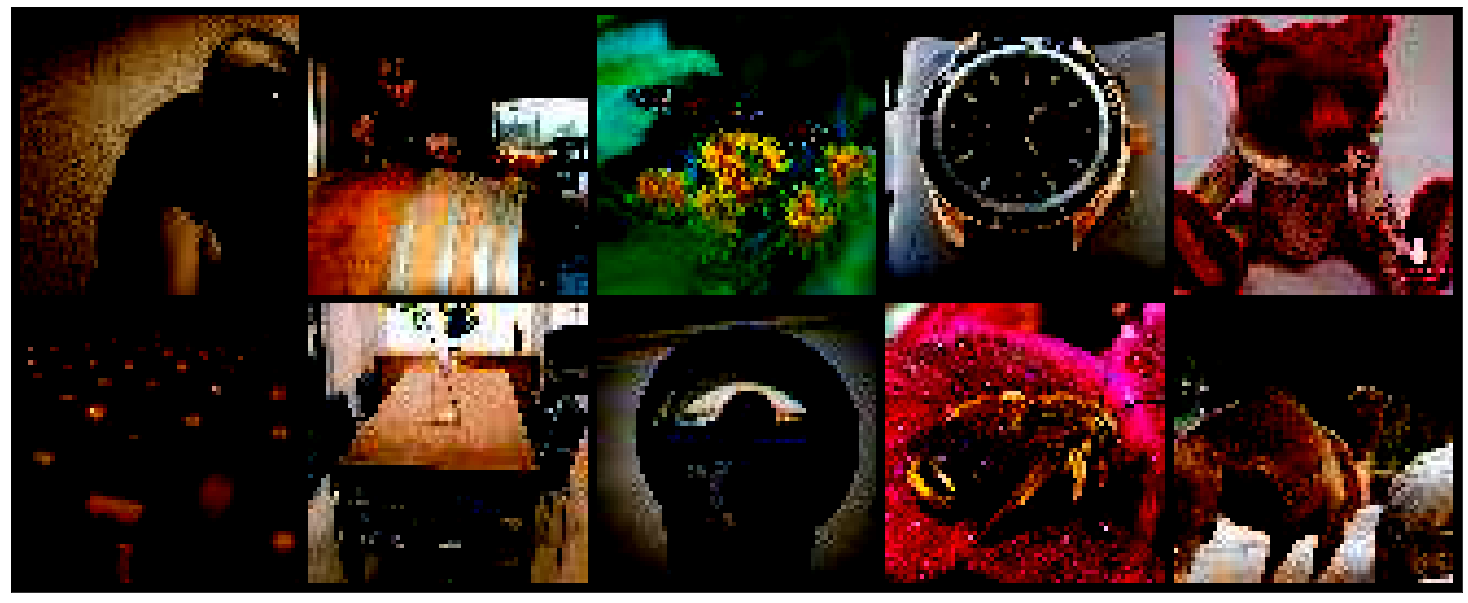

In [0]:
show_batch(train_dl)
show_batch(test_dl)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = modeldef.ResNet18().to(device)
model=models.resnet18()
model.avgpool=nn.AdaptiveAvgPool2d(1)
num_ftrs = model.fc.in_features
model.fc=nn.Linear(num_ftrs,200)
model=model.to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1

In [0]:
for images, labels in train_dl:
    images, labels = images.cuda(), labels.cuda()
    print('images.shape:', images.shape)
    #print('Length of images : {}'.format(len(images)))
    #print('Length of Labels : {}'.format(len(labels)))
    out = model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([256, 3, 64, 64])
out.shape: torch.Size([256, 200])


In [0]:
import torch.optim as optim
#model =  modeldef.net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9,weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.0935, total_steps=50,anneal_strategy='linear' ,base_momentum=0.85, max_momentum=0.95,steps_per_epoch=None,epochs=None,div_factor=8.0, pct_start=0.2, final_div_factor=8.0)

EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    modeltrt.train(model, device, train_dl, optimizer, epoch)
    modeltrt.test(model, device, test_dl)
    scheduler.step()

  0%|          | 0/301 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 4.7533, Accuracy: 1649/33000 (5.00%)

EPOCH: 1


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 4.5923, Accuracy: 2232/33000 (6.76%)

EPOCH: 2


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 4.3085, Accuracy: 3287/33000 (9.96%)

EPOCH: 3


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 4.1233, Accuracy: 3968/33000 (12.02%)

EPOCH: 4


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 4.1662, Accuracy: 3713/33000 (11.25%)

EPOCH: 5


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.9588, Accuracy: 4841/33000 (14.67%)

EPOCH: 6


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.8903, Accuracy: 4865/33000 (14.74%)

EPOCH: 7


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.9653, Accuracy: 4765/33000 (14.44%)

EPOCH: 8


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.7965, Accuracy: 5554/33000 (16.83%)

EPOCH: 9


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.6499, Accuracy: 6129/33000 (18.57%)

EPOCH: 10


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.8268, Accuracy: 5408/33000 (16.39%)

EPOCH: 11


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.7188, Accuracy: 6042/33000 (18.31%)

EPOCH: 12


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.5368, Accuracy: 6846/33000 (20.75%)

EPOCH: 13


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.5538, Accuracy: 6601/33000 (20.00%)

EPOCH: 14


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.5902, Accuracy: 6461/33000 (19.58%)

EPOCH: 15


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.5216, Accuracy: 6845/33000 (20.74%)

EPOCH: 16


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.3978, Accuracy: 7667/33000 (23.23%)

EPOCH: 17


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.4979, Accuracy: 7102/33000 (21.52%)

EPOCH: 18


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.3987, Accuracy: 7671/33000 (23.25%)

EPOCH: 19


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.5019, Accuracy: 7263/33000 (22.01%)

EPOCH: 20


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.4536, Accuracy: 7201/33000 (21.82%)

EPOCH: 21


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.3778, Accuracy: 7939/33000 (24.06%)

EPOCH: 22


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.4167, Accuracy: 7748/33000 (23.48%)

EPOCH: 23


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.3028, Accuracy: 8210/33000 (24.88%)

EPOCH: 24


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.2197, Accuracy: 8699/33000 (26.36%)

EPOCH: 25


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.0883, Accuracy: 9464/33000 (28.68%)

EPOCH: 26


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.1996, Accuracy: 8910/33000 (27.00%)

EPOCH: 27


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.1674, Accuracy: 9128/33000 (27.66%)

EPOCH: 28


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.1813, Accuracy: 8910/33000 (27.00%)

EPOCH: 29


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.2370, Accuracy: 8713/33000 (26.40%)

EPOCH: 30


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.1101, Accuracy: 9357/33000 (28.35%)

EPOCH: 31


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.1345, Accuracy: 9324/33000 (28.25%)

EPOCH: 32


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.2661, Accuracy: 8770/33000 (26.58%)

EPOCH: 33


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.3976, Accuracy: 8217/33000 (24.90%)

EPOCH: 34


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.0283, Accuracy: 9690/33000 (29.36%)

EPOCH: 35


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.9543, Accuracy: 10382/33000 (31.46%)

EPOCH: 36


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.9122, Accuracy: 10573/33000 (32.04%)

EPOCH: 37


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.9372, Accuracy: 10404/33000 (31.53%)

EPOCH: 38


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 3.1631, Accuracy: 9402/33000 (28.49%)

EPOCH: 39


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.8515, Accuracy: 10920/33000 (33.09%)

EPOCH: 40


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.8257, Accuracy: 11116/33000 (33.68%)

EPOCH: 41


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.8718, Accuracy: 10740/33000 (32.55%)

EPOCH: 42


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.9354, Accuracy: 10686/33000 (32.38%)

EPOCH: 43


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.7605, Accuracy: 11692/33000 (35.43%)

EPOCH: 44


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.7605, Accuracy: 11577/33000 (35.08%)

EPOCH: 45


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.6942, Accuracy: 12011/33000 (36.40%)

EPOCH: 46


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.5634, Accuracy: 12888/33000 (39.05%)

EPOCH: 47


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.5570, Accuracy: 12959/33000 (39.27%)

EPOCH: 48


  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Avg loss: 2.4443, Accuracy: 13701/33000 (41.52%)

EPOCH: 49


Loss=2.442439556121826 Accuracy=41.84: 100%|██████████| 301/301 [01:33<00:00,  3.22it/s]



Test set: Avg loss: 2.3769, Accuracy: 14143/33000 (42.86%)




Learning rate search finished. See the graph with {finder_name}.plot()


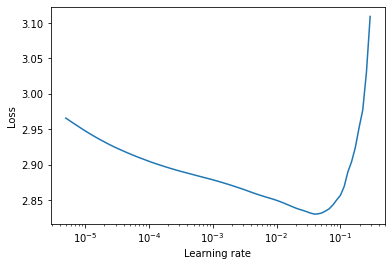

In [0]:


#model = modeldef.S11Model().to(device)
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
#modeltrt.lrfinder(model, device, train_loader, optimizer)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader=train_dl, val_loader=test_dl, start_lr=0.000001, end_lr=0.5,num_iter=98)
lr_finder.plot()
lr_finder.reset()